<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex09_optimazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.텐서플로우 버전

In [ ]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass

1. 패키지 불러오기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
tf.set_random_seed(777) #for reproducibility

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3bd31e7e10>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3bd205d518>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3bd205d6d8>)

In [ ]:
nb_classes = 10

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [ ]:
W= tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))


In [ ]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

In [ ]:
cost = tf.reduce_mean(-tf.reduce_sum(Y *tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

In [ ]:
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      _, cost_val = sess.run([train, cost], feed_dict = {X:batch_xs, Y: batch_ys})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost : {:.9f}".format(epoch+1, avg_cost))

  print("Learning Finished")

  print(
    "Accuracy:",
    accuracy.eval(
        session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}
    ),
)


Epoch: 0001, Cost : 2.955275845
Epoch: 0002, Cost : 1.127278760
Epoch: 0003, Cost : 0.895299874
Epoch: 0004, Cost : 0.784176587
Epoch: 0005, Cost : 0.715547652
Epoch: 0006, Cost : 0.667010797
Epoch: 0007, Cost : 0.630328157
Epoch: 0008, Cost : 0.600863722
Epoch: 0009, Cost : 0.576640872
Epoch: 0010, Cost : 0.556295814
Epoch: 0011, Cost : 0.538398079
Epoch: 0012, Cost : 0.523201100
Epoch: 0013, Cost : 0.509544469
Epoch: 0014, Cost : 0.496836727
Epoch: 0015, Cost : 0.485890634
Learning Finished
Accuracy: 0.886


Label: [0]
prediction:  [1]


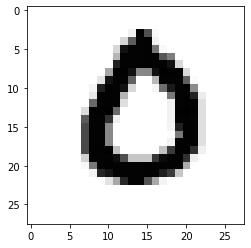

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
 
  r = random.randint(0, mnist.test.num_examples -1)
  print("Label:", sess.run(tf.argmax(mnist.test.labels[r : r+1],1)))
  print(
      "prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r :r+1]}),
)

plt.imshow(
    mnist.test.images[r :r + 1].reshape(28,28),
    cmap = "Greys",
    interpolation = 'nearest'
)

plt.show()